# Logistic Regression: 
## Predict whether a person makes over 50K per year using the Census Income Data Set

In [34]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
os.getcwd()

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
             'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df_train = pd.read_csv("/Users/zhanebennett/Downloads/Adult//adult.data", header=None, names = col_names)
df_test = pd.read_csv("/Users/zhanebennett/Downloads/Adult//adult.test", header=None, names = col_names)

df_train = df_train.iloc[0:16281]  #train and test datasets need to be the same size
df_train.head(5)     # with this command you can see your file

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Cleaning

In [35]:
df_train = df_train.drop(columns=['fnlwgt'])     #dropping this column
df_test = df_test.drop(columns=['fnlwgt'])

df_test['income'] = df_test['income'].replace([" >50K."], " >50K")  #income values slightly different in test datasets
df_test['income'] = df_test['income'].replace([" <=50K."], " <=50K")

In [36]:
#df_train['income_binary'] = (df_train['income'] == " >50K").astype(int)
#df_test['income_binary'] = (df_test['income'] == " >50K").astype(int)

#df_train.head(1)
df_test.head(1)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [37]:
col_names = df_train.columns.values.tolist()
df_train = df_train.apply(lambda x: x.str.strip() if x.dtype == "object" else x) #remove trailing whitespace from dataframe
df_test = df_test.apply(lambda x: x.str.strip() if x.dtype == "object" else x) #remove trailing whitespace from dataframe
for i in col_names: print (i, ": ", df_train[i].unique(), "\n")  

age :  [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85] 

workclass :  ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education :  ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

education-num :  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status :  ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation :  ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-s

# Exploration

In [38]:
print("Train Values: " , df_train['income'].unique(),"\n",
      "Test Values: " , df_test['income'].unique(),"\n", "\n",
      "Train Counts: ", "\n", df_train['income'].value_counts(), "\n","\n",
      "Test Counts: ","\n", df_test['income'].value_counts(), "\n",
     )

Train Values:  ['<=50K' '>50K'] 
 Test Values:  ['<=50K' '>50K'] 
 
 Train Counts:  
 <=50K    12384
>50K      3897
Name: income, dtype: int64 
 
 Test Counts:  
 <=50K    12435
>50K      3846
Name: income, dtype: int64 



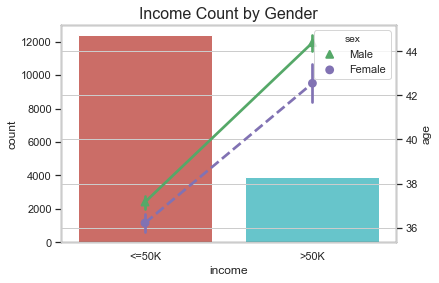

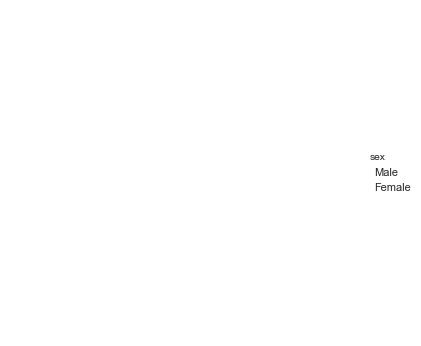

In [206]:
import seaborn as sns
%matplotlib inline  



ax1 = sns.countplot(x='income', data = df_train, palette = 'hls')
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

ax1.set_title('Income Count by Gender', fontsize=16)
ax1.grid(False)

ax2 = ax1.twinx()
ax2.grid(False)
ax2.grid(b=None)

ax2 = sns.catplot(x="income", y="age", hue="sex",
            palette={"Male": "g", "Female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=df_train, ax=ax2)


plt.axis('off')
plt.grid(b=None)
plt.box(False)

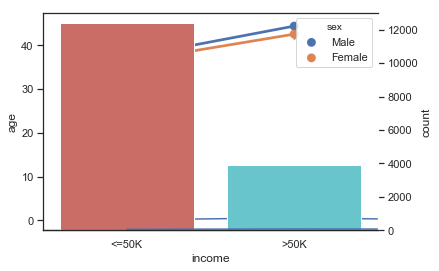

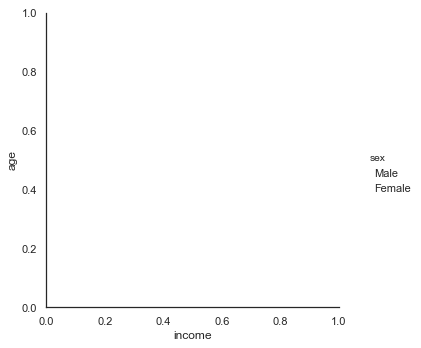

In [207]:

sns.set_style("white")

fig, ax = plt.subplots()
ax.plot(np.random.rand(10))



ax2 =ax.twinx()
ax2.plot(100*np.random.rand(10))
sns.despine(ax=ax, right=True, left=True)

#sns.despine(ax=ax2, left=True, right=False)
sns.countplot(x='income', data = df_train, palette = 'hls', ax=ax2)
sns.catplot(x="income", y="age", hue = 'sex', kind="point", data=df_train, ax=ax)

ax2.spines['right'].set_color('white')

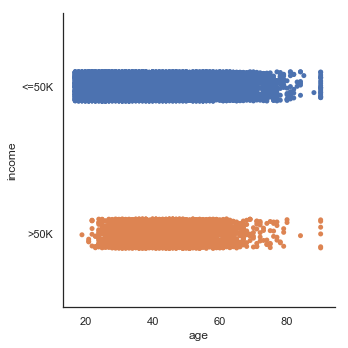

In [172]:
sns.catplot(x="age", y="income", data=df_train)

## Visualization

In [15]:
df.groupby("income").agg({"age": ['mean', 'count']})

age       
             mean  count
income                  
<=50K   36.796592  12384
>50K    44.109315   3897

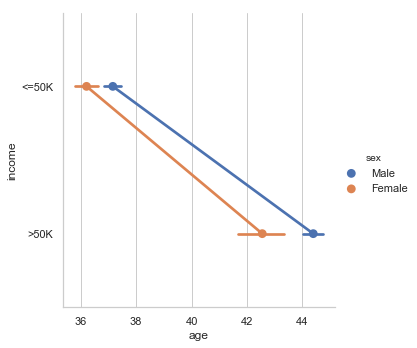

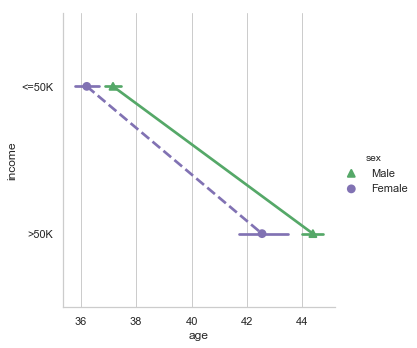

In [28]:
sns.catplot(x="age", y="income", hue = 'sex', kind="point", data=df_train)
plt.show()
#####
sns.catplot(x="age", y="income", hue="sex",
            palette={"Male": "g", "Female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=df_train)


plt.show()

## Dummy Variables

In [7]:
dummy_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

for var in dummy_vars:
    dummy_list='var'+'_'+var
    dummy_list = pd.get_dummies(df_train[var], prefix=var, drop_first=True)
    data1=df_train.join(dummy_list)
    df_train=data1 

In [8]:
for var in dummy_vars:                #same for test 
    dummy_list='var'+'_'+var
    dummy_list = pd.get_dummies(df_test[var], prefix=var, drop_first=True)
    data1=df_test.join(dummy_list)
    df_test=data1

In [9]:
df_train.head(1)
df_test.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       ...
       'native-country_Puerto-Rico', 'native-country_Scotland',
       'native-country_South', 'native-country_Taiwan',
       'native-country_Thailand', 'native-country_Trinadad&Tobago',
       'native-country_United-States', 'native-country_Vietnam',
       'native-country_Yugoslavia', 'income_>50K'],
      dtype='object', length=108)

In [10]:
df_vars=df_train.columns.tolist()                    #list of all vars including new dummy vars
to_keep=[i for i in df_vars if i not in dummy_vars]  #replace vars with new dummy vars
df_train = df_train[to_keep]                         #update dataframe with dummy variables 

df_vars=df_test.columns.tolist()                     #same for test --> columns have slightly different names
to_keep=[i for i in df_vars if i not in dummy_vars]  #replace vars with new dummy vars
df_test = df_test[to_keep]                           #same for test

df_vars_final=df_train.columns.tolist()              #list of all vars in updated df

In [11]:
df_vars_final[:5]

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

## Recursive Feature Elimination

a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. I set the parameter n_features_to_select = 1 to get a full ranking of features. If I set it to anything greater than 1, it will rank the top n as 1 then will descend in order.

In [42]:
from sklearn.feature_selection import RFE            #import RFE module
from sklearn.linear_model import LogisticRegression  # import the Logistic Regression module

y = ['income_>50K']                                  # DV
X = [i for i in df_vars_final if i not in y]         # all features exzcept DV

X_train = df_train[X]              #features
y_train = df_train['income_>50K']   #target variable

X_test = df_test[X]                 #features
y_test = df_test['income_>50K']     #target variable

In [45]:
logreg = LogisticRegression(C=1e5, solver='lbfgs') #,max_iter=90000)
selector = RFE(logreg, 1)                           # selecting top 1 features
selector = selector.fit(X_train, y_train)
print(selector.support_)
order = selector.ranking_
print(order)

/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to 

/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to 

/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to 

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[83 52 95 94 82 46 64 92 65 87 50 48 93 27 55 67 73 69 11 77 79 19  5 78
 16  2  7 70 12  6 59 39 62 71 89 91 90 33 25 29 49 21  1 43 44 45 38 76
 74 22  8 47 36 53 60 18 54 37 85 42 28 10 72 31 15 32 88 57 40 24 26  9
 58 96 86 30 75 34 41 56 98  4 13 14  3 23 68 81 80 63 84 61 35 97 66 51
 17 20]


In [46]:
rankings = dict(zip(order, X_train.columns.values))  #pair rankings and variables in a dictionary

import collections          
ordered_rankings = collections.OrderedDict(sorted(rankings.items()))    #order dictionary by key to see top features

feature_ranks = []                                                     #list of all features and their ranks
for key, value in ordered_rankings.items(): feature_ranks.append(f"{key}. {value}") 

feature_ranks[0:20]


['1. occupation_Priv-house-serv',
 '2. education_Preschool',
 '3. native-country_Outlying-US(Guam-USVI-etc)',
 '4. native-country_Laos',
 '5. education_Doctorate',
 '6. marital-status_Married-civ-spouse',
 '7. education_Prof-school',
 '8. relationship_Own-child',
 '9. native-country_Haiti',
 '10. native-country_Columbia',
 '11. education_9th',
 '12. marital-status_Married-AF-spouse',
 '13. native-country_Mexico',
 '14. native-country_Nicaragua',
 '15. native-country_Ecuador',
 '16. education_Masters',
 '17. native-country_Vietnam',
 '18. race_Other',
 '19. education_Bachelors',
 '20. native-country_Yugoslavia']

In [47]:
top_20 = [v for k, v in ordered_rankings.items() if k <= 20] # using the top 20 features
top_20

['occupation_Priv-house-serv',
 'education_Preschool',
 'native-country_Outlying-US(Guam-USVI-etc)',
 'native-country_Laos',
 'education_Doctorate',
 'marital-status_Married-civ-spouse',
 'education_Prof-school',
 'relationship_Own-child',
 'native-country_Haiti',
 'native-country_Columbia',
 'education_9th',
 'marital-status_Married-AF-spouse',
 'native-country_Mexico',
 'native-country_Nicaragua',
 'native-country_Ecuador',
 'education_Masters',
 'native-country_Vietnam',
 'race_Other',
 'education_Bachelors',
 'native-country_Yugoslavia']

## Statistical Significance

In [48]:
X = top_20                         # all features exzcept DV

X_train = df_train[X]              #features
y_train = df_train['income_>50K']   #target variable

X_test = df_test[X]                #features
y_test = df_test['income_>50K']     #target variable

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)             
result=logit_model.fit()
print(result.summary2())

         Current function value: inf
         Iterations: 35
                                            Results: Logit
Model:                            Logit                          Pseudo R-squared:               inf   
Dependent Variable:               income_>50K                    AIC:                            inf   
Date:                             2020-09-04 00:18               BIC:                            inf   
No. Observations:                 16281                          Log-Likelihood:                 -inf  
Df Model:                         19                             LL-Null:                        0.0000
Df Residuals:                     16261                          LLR p-value:                    1.0000
Converged:                        0.0000                         Scale:                          1.0000
No. Iterations:                   35.0000                                                              
------------------------------------------------

/Users/zhanebennett/.local/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/zhanebennett/.local/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/zhanebennett/.local/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/zhanebennett/.local/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/zhanebennett/.local/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversion

In [49]:
high_p_value = ['occupation_Priv-house-serv', 'education_Preschool', 'native-country_Outlying-US(Guam-USVI-etc)',
               'native-country_Laos', 'marital-status_Married-AF-spouse', 'native-country_Ecuador', 'education_Bachelors',
               'native-country_Yugoslavia']

X = [i for i in top_20 if i not in high_p_value]         # The p-values for most of the variables are smaller than 0.05 

X_train = df_train[X]              #features
y_train = df_train['income_>50K']   #target variable

X_test = df_test[X]                #features
y_test = df_test['income_>50K']     #target variable

logit_model=sm.Logit(y_train,X_train)             
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                                  Results: Logit
Model:                     Logit                   Pseudo R-squared:        inf   
Dependent Variable:        income_>50K             AIC:                     inf   
Date:                      2020-09-04 00:18        BIC:                     inf   
No. Observations:          16281                   Log-Likelihood:          -inf  
Df Model:                  11                      LL-Null:                 0.0000
Df Residuals:              16269                   LLR p-value:             1.0000
Converged:                 1.0000                  Scale:                   1.0000
No. Iterations:            8.0000                                                 
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------

/Users/zhanebennett/.local/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/zhanebennett/.local/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/zhanebennett/.local/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/zhanebennett/.local/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


## Fitting the model to the test data

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


##  Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)                 #I'm getting 12256+642 correct predictions and 179+3204 incorrect predictions

[[12256   179]
 [ 3204   642]]


## Precision, Recall, F-measure and Support
Precision is the ratio tp / (tp + fp) -- the ability of the classifier to not label a sample as positive if it is negative.
Recall is the ratio tp / (tp + fn) -- the ability of the classifier to find all the positive samples.
The support is the number of occurrences of each class in y_test.

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     12435
           1       0.78      0.17      0.28      3846

    accuracy                           0.79     16281
   macro avg       0.79      0.58      0.58     16281
weighted avg       0.79      0.79      0.74     16281



Interpretation: 
    
Of the entire test set, 79% of the predicted income was correctly labeled.
Of the entire test set, 79% of the people with incomes >50K were found.

## Evaluation of model accuracty with ROC and AUC

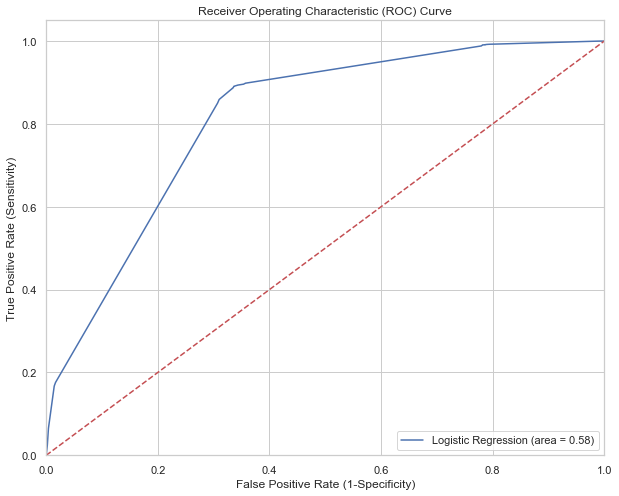

AUC: 0.812868465683541


In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('AUC: {}'.format(auc(fpr, tpr)))